# Climate Prediction Using Temporal Fusion Transformers (TFT)

This notebook presents a step-by-step time series forecasting pipeline using the Temporal Fusion Transformer (TFT) model from the Darts library. The project focuses on climate prediction using historical and auxiliary covariate data.

###  Project Objectives
- Forecast future climate indicators (e.g., temperature, humidity)
- Utilize temporal covariates and deep learning techniques
- Incorporate probabilistic forecasting and backtesting for performance validation

###  Tools & Libraries
- Python, Darts, Pandas, Matplotlib, NumPy
- Google Colab for cloud-based execution

---

### Mounting Google Drive
Mount Google Drive to access project files and datasets.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Creating required folders and files

In [ ]:
import os
file_path ="/content/drive/MyDrive/Climate_prediction"
os.makedirs(file_path, exist_ok=True)
print(f" Directory '{file_path}' created.")


### Creating requirements
Create a text file including all the required libraries for this project

In [2]:
requirements="""
pandas
numpy
matplotlib
dotenv
kagglehub
seaborn
darts[all]
"""
requirements_file_path="/content/drive/MyDrive/Climate_prediction/requirements.txt"
with open(requirements_file_path, "w") as f:
    f.write(requirements.strip())
print(f"File '{requirements_file_path}' created.")

File '/content/drive/MyDrive/Climate_prediction/requirements.txt' created.


###  Data downloading structure

To download data directly from Kaggle, you can use the `kagglehub` library.

First, ensure you have the `kagglehub` library installed. Since it's already in the `requirements.txt` we created, you can install it from there.

Then, you'll need to set up your Kaggle API credentials securely using Colab secrets.
1. Go to your Kaggle account settings and create an API token. This will download a `kaggle.json` file.
2. Open the `kaggle.json` file and copy your username and key.
3. In Colab, open the secrets manager (🔑 icon on the left panel).
4. Add two new secrets:
    - Name: `KAGGLE_USERNAME`, Value: your Kaggle username
    - Name: `KAGGLE_KEY`, Value: your Kaggle API key

Now, you can use the code below to set up the Kaggle API and download a dataset. Replace `"kaggle/titanic"` with the dataset identifier you need.

In [3]:
# Install dependencies from requirements.txt
!pip install -r "/content/drive/MyDrive/Climate_prediction/requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import os
from google.colab import userdata

# Configure Kaggle API credentials from Colab secrets
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

### Safe download of data from Kaggle.com

In [5]:
import kagglehub
import os
import shutil

# Replace with the actual dataset identifier from Kaggle
dataset_id = "sumanthvrao/daily-climate-time-series-data"

# Let kagglehub download to its default cache location in Colab
# This will typically be under /kaggle/input
# We remove the 'path' argument to let it use the default location
downloaded_kaggle_cache_path = kagglehub.dataset_download(dataset_id)

print(f"Dataset '{dataset_id}' downloaded to Kaggle cache at: {downloaded_kaggle_cache_path}")

# Define the desired path in your drive directory
target_drive_path = os.path.join("/content/drive/MyDrive/Climate_prediction", dataset_id.replace("/", "_"))

# Ensure the target directory exists in your drive
os.makedirs(target_drive_path, exist_ok=True)

# The error message indicates the data is accessible at '/kaggle/input/daily-climate-time-series-data'
# We need to find the exact location of the downloaded files within the cache path.
# Based on the error, it's likely directly under the cache path or within a subdirectory.
# Let's assume the data files are directly in the downloaded_kaggle_cache_path for this dataset.
# If not, you might need to adjust 'source_data_path' to point to the correct subdirectory.

source_data_path = downloaded_kaggle_cache_path
print(f"\nCopying data from '{source_data_path}' to '{target_drive_path}'")

try:
    # List contents of the source path to verify
    print(f"\nContents of source path '{source_data_path}':")
    source_items = os.listdir(source_data_path)
    for item in source_items:
        print(item)

    # Copy all files and directories from the source to the target drive path
    for item in source_items:
        s = os.path.join(source_data_path, item)
        d = os.path.join(target_drive_path, item)
        if os.path.isdir(s):
            # Use copytree for directories, overwrite if exists
            shutil.copytree(s, d, dirs_exist_ok=True)
            print(f"Copied directory: {item}")
        else:
            # Use copy2 for files, preserve metadata
            shutil.copy2(s, d)
            print(f"Copied file: {item}")

    print("\nDataset successfully copied to Google Drive.")

except FileNotFoundError:
     print(f"Error: Could not find the source data at '{source_data_path}'.")
except Exception as e:
     print(f"An error occurred during copying files: {e}")


# List the files in the target drive directory to confirm
print(f"\nFiles in the target drive directory '{target_drive_path}':")
if os.path.exists(target_drive_path):
    for root, dirs, files in os.walk(target_drive_path):
        for name in files:
            print(os.path.join(root, name))
else:
    print("Target directory does not exist after copy attempt.")

Dataset 'sumanthvrao/daily-climate-time-series-data' downloaded to Kaggle cache at: /kaggle/input/daily-climate-time-series-data

Copying data from '/kaggle/input/daily-climate-time-series-data' to '/content/drive/MyDrive/Climate_prediction/sumanthvrao_daily-climate-time-series-data'

Contents of source path '/kaggle/input/daily-climate-time-series-data':
DailyDelhiClimateTrain.csv
DailyDelhiClimateTest.csv
Copied file: DailyDelhiClimateTrain.csv
Copied file: DailyDelhiClimateTest.csv

Dataset successfully copied to Google Drive.

Files in the target drive directory '/content/drive/MyDrive/Climate_prediction/sumanthvrao_daily-climate-time-series-data':
/content/drive/MyDrive/Climate_prediction/sumanthvrao_daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/content/drive/MyDrive/Climate_prediction/sumanthvrao_daily-climate-time-series-data/DailyDelhiClimateTest.csv


### Importing libraries and packages for the project
Create directories and config files required for the project.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel,TFTModel
from darts.metrics import mae
from darts.utils.likelihood_models.torch import GaussianLikelihood,QuantileRegression


### 📥 Data Loading
Read and prepare time series and covariate data.

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Climate_prediction/sumanthvrao_daily-climate-time-series-data/DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


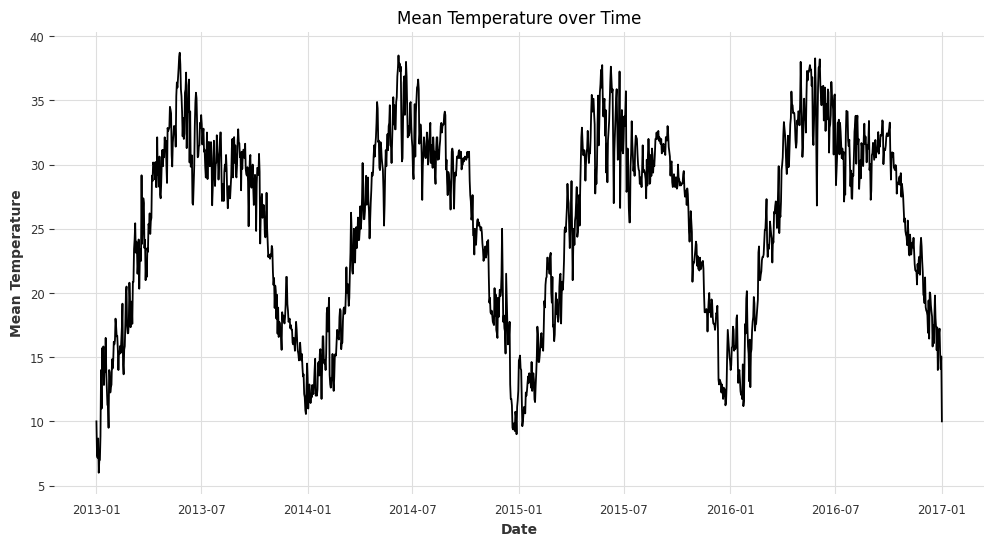

In [8]:

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by date
df_sorted = df.sort_values(by='date')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['date'], df_sorted['meantemp'])
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature over Time')
plt.grid(True)
plt.show()

In [9]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [10]:
df_base =df[['date','meantemp']]
df_base.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


## Data Preprocessing
Creating time series, splitting, and scaling

In [11]:
temp_series=TimeSeries.from_dataframe(df_base,'date','meantemp').astype(np.float32)
temp_series

<TimeSeries (DataArray) (date: 1462, component: 1, sample: 1)> Size: 6kB
array([[[10.       ]],

       [[ 7.4      ]],

       [[ 7.1666665]],

       ...,

       [[14.095238 ]],

       [[15.052631 ]],

       [[10.       ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 12kB 2013-01-01 2013-01-02 ... 2017-01-01
  * component  (component) <U8 32B 'meantemp'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

### Train test data split

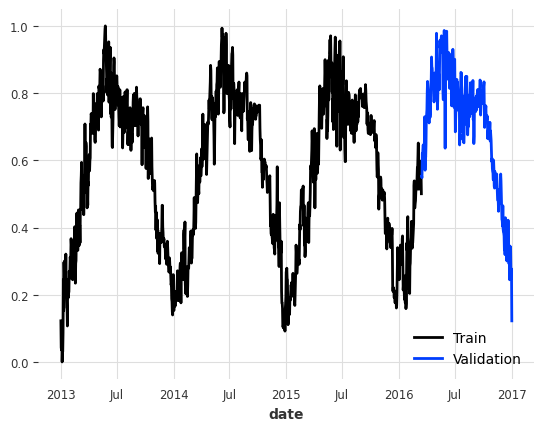

In [12]:
sc=Scaler()
train_series, val_series = temp_series.split_after(0.8)
train_sc=sc.fit_transform(train_series)
val_sc=sc.transform(val_series)
temp_series_sc=sc.fit_transform(temp_series)
train_sc.plot(label="Train")
val_sc.plot(label="Validation")
plt.legend()
plt.show()

## Probabilistic LSTM model without covariates

In [13]:
model_name="LSTM_NoCovar"
model_=RNNModel(
    input_chunk_length=190,
    training_length=200,
    hidden_dim=50,
    n_rnn_layers=2,
    n_epochs=15,
    dropout=0.2,
    likelihood=GaussianLikelihood(),
    random_state=0,
    model_name=model_name,
    save_checkpoints=True,
    force_reset=True
)
model_.fit(series=train_sc,val_series=val_sc)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 7.8 K  | train
6 | V               | Linear           | 102    | train
-------------------------------------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)
7         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


RNNModel(model=RNN, hidden_dim=50, n_rnn_layers=2, dropout=0.2, training_length=200, input_chunk_length=190, n_epochs=15, likelihood=GaussianLikelihood(prior_mu=None, prior_sigma=None, beta_nll=0.0, prior_strength=1.0), random_state=0, model_name=LSTM_NoCovar, save_checkpoints=True, force_reset=True)

### 📈 Forecasting
Use the trained model to generate future predictions.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

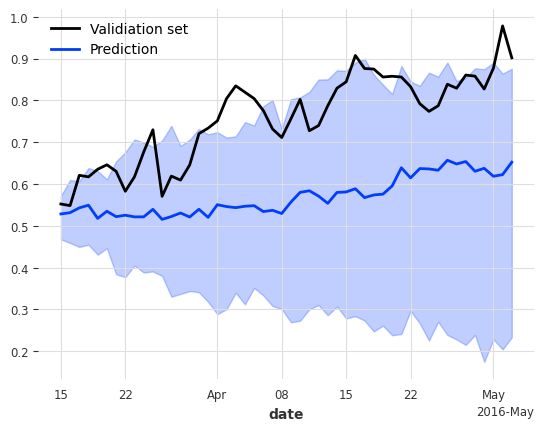

In [14]:
model_rnn=RNNModel.load_from_checkpoint(model_name=model_name,best=True)
pred=model_rnn.predict(n=50,num_samples=30)
val_sc.slice_intersect(pred).plot(label="Validiation set")
pred.plot(label="Prediction")
plt.legend()
plt.show()

In [15]:
# Define the forecast horizon
forecast_horizon = 10

# Generate historical forecasts
# 'start' specifies the first point in time where a forecast is made
# 'retrain=False' means the model is not retrained at each step (faster, but assumes stationarity)
# 'last_points_only=True' means we only keep the forecast for the specified horizon
historical_preds_sc = model_rnn.historical_forecasts(
    series=temp_series_sc,
    start=val_sc.start_time(), # Example start date for historical forecasts
    forecast_horizon=forecast_horizon,
    stride=5, # Make a forecast at every step
    retrain=False,
    verbose=True,
    last_points_only=True
)

# Inverse transform the historical forecasts and the actual data
historical_preds = sc.inverse_transform(historical_preds_sc)
actual_historical = sc.inverse_transform(temp_series_sc[val_sc.start_time() + pd.Timedelta(days=forecast_horizon-1):]) # Adjust start to align with forecast end

# Calculate the MAE on the historical forecasts
mae_historical = mae(actual_historical, historical_preds)

print(f"\nMean Absolute Error (MAE) on historical forecasts (horizon={forecast_horizon}): {mae_historical:.4f}")

# You would integrate this into a hyperparameter tuning loop,
# calculating this MAE for each set of parameters and selecting the best ones.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]


Mean Absolute Error (MAE) on historical forecasts (horizon=10): 3.2595


## Probabilistic LSTM models with covariates

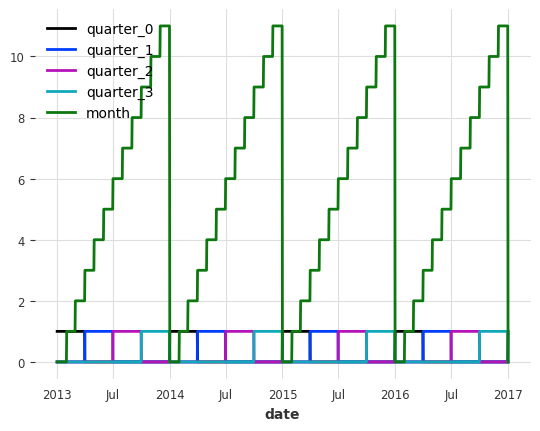

In [16]:
month_cov=datetime_attribute_timeseries(
    temp_series,
    attribute="month",
    one_hot=False,
    dtype=np.float32
)
quarter_cov=datetime_attribute_timeseries(
    temp_series,
    attribute="quarter",
    one_hot=True,
    dtype=np.float32
)
quarter_cov.plot()
month_cov.plot()
plt.show()


In [17]:
# Split covariates into train and validation sets
covariates=month_cov.stack(quarter_cov)
train_cov, val_cov = covariates.split_after(0.8)


In [18]:
model_name="LSTM_Cov"
model_=RNNModel(
    input_chunk_length=190,
    training_length=200,
    hidden_dim=50,
    n_rnn_layers=2,
    n_epochs=15,
    dropout=0.2,
    likelihood=GaussianLikelihood(),
    random_state=0,
    model_name=model_name,
    save_checkpoints=True,
    force_reset=True
)


model_.fit(series=train_sc, future_covariates=train_cov, val_series=val_sc, val_future_covariates=val_cov)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 8.0 K  | train
6 | V               | Linear           | 102    | train
-------------------------------------------------------------
8.1 K     Trainable params
0         Non-trainable params
8.1 K     Total params
0.032     Total estimated model params size (MB)
7         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


RNNModel(model=RNN, hidden_dim=50, n_rnn_layers=2, dropout=0.2, training_length=200, input_chunk_length=190, n_epochs=15, likelihood=GaussianLikelihood(prior_mu=None, prior_sigma=None, beta_nll=0.0, prior_strength=1.0), random_state=0, model_name=LSTM_Cov, save_checkpoints=True, force_reset=True)

### 📈 Forecasting
Use the trained model to generate future predictions.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

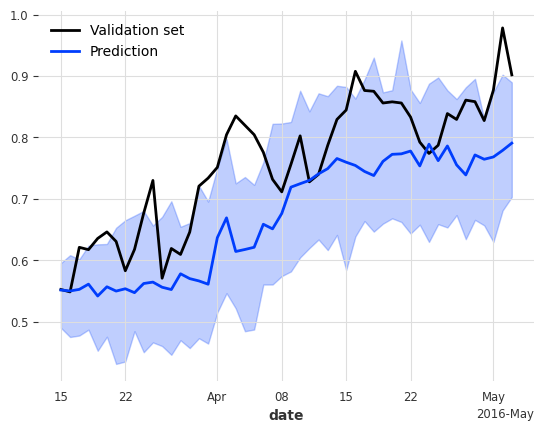

In [19]:
model_cov=RNNModel.load_from_checkpoint(model_name=model_name,best=True)

# Predict using the model with covariates, providing the full future covariates time series
pred=model_cov.predict(n=50, num_samples=30, future_covariates=covariates)

val_sc.slice_intersect(pred).plot(label="Validation set")
pred.plot(label="Prediction")
plt.legend()
plt.show()

In [20]:

# Define the forecast horizon
forecast_horizon = 10

# Generate historical forecasts
# 'start' specifies the first point in time where a forecast is made
# 'retrain=False' means the model is not retrained at each step (faster, but assumes stationarity)
# 'last_points_only=True' means we only keep the forecast for the specified horizon
historical_preds_sc = model_cov.historical_forecasts(
    series=temp_series_sc,
    future_covariates=covariates, # Provide the full concatenated covariates
    start=val_sc.start_time(), # Example start date for historical forecasts
    forecast_horizon=forecast_horizon,
    stride=5, # Make a forecast at every step
    retrain=False,
    verbose=True,
    last_points_only=True
)

# Inverse transform the historical forecasts and the actual data
historical_preds = sc.inverse_transform(historical_preds_sc)
# Adjust the slicing for actual_historical to match the time index of historical_preds
actual_historical = sc.inverse_transform(temp_series_sc.slice_intersect(historical_preds))

# Calculate the MAE on the historical forecasts
mae_historical = mae(actual_historical, historical_preds)

print(f"\nMean Absolute Error (MAE) on historical forecasts (horizon={forecast_horizon}): {mae_historical:.4f}")

# You would integrate this into a hyperparameter tuning loop,
# calculating this MAE for each set of parameters and selecting the best ones.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]


Mean Absolute Error (MAE) on historical forecasts (horizon=10): 2.2729


## Temporal Fusion Transformer(TFT)

In [21]:
feature_df = df.drop(columns=['date'])
feature_df.head()

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000


In [22]:
corr_mat=feature_df.corr()

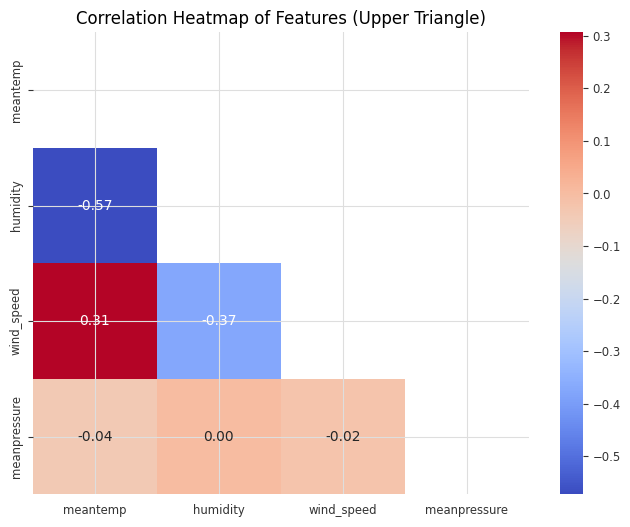

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)
plt.title('Correlation Heatmap of Features (Upper Triangle)')
plt.show()

In [24]:
# Create a TimeSeries from the 'wind_speed' and 'humidity' columns
# Ensure the 'date' column is used as the time index
past_covariates = TimeSeries.from_dataframe(df, time_col='date', value_cols=['wind_speed', 'humidity']).astype(np.float32)

# Print the head of the past covariates TimeSeries to verify
print(past_covariates.head())

<TimeSeries (DataArray) (date: 5, component: 2, sample: 1)> Size: 40B
array([[[ 0.       ],
        [84.5      ]],

       [[ 2.98     ],
        [92.       ]],

       [[ 4.633333 ],
        [87.       ]],

       [[ 1.2333333],
        [71.333336 ]],

       [[ 3.7      ],
        [86.833336 ]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 40B 2013-01-01 2013-01-02 ... 2013-01-05
  * component  (component) <U10 80B 'wind_speed' 'humidity'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None


In [25]:
# Scale the past covariates using the previously fitted scaler
train_past_covariates, val_past_covariates = past_covariates.split_after(0.8)
sc_cov=Scaler()
train_past_covariates_sc = sc_cov.fit_transform(train_past_covariates)
val_past_covariates_sc = sc_cov.transform(val_past_covariates)
past_covariates_sc = sc_cov.transform(past_covariates)


###  Model Initialization
Configure the Temporal Fusion Transformer model.

In [26]:
model_name="TFT"
model_ = TFTModel(
    input_chunk_length=190,
    output_chunk_length=10,
    hidden_size=50,
    dropout=0.2,
    lstm_layers=2,
    num_attention_heads=4,
    likelihood=QuantileRegression(),
    random_state=0,
    n_epochs=15,
    model_name=model_name,
    save_checkpoints=True,
    force_reset=True
)

model_.fit(series=train_sc,
           past_covariates=train_past_covariates_sc,
           future_covariates=train_cov,
           val_series=val_sc,
           val_past_covariates=val_past_covariates_sc,
           val_future_covariates=val_cov)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 11.7 K | train
5  | decoder_vsn                       | _VariableSelectionNetwork   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


TFTModel(output_chunk_shift=0, hidden_size=50, lstm_layers=2, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.2, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=QuantileRegression(quantiles=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99], prior_strength=1.0), norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=190, output_chunk_length=10, random_state=0, n_epochs=15, model_name=TFT, save_checkpoints=True, force_reset=True)

### 🔁 Backtesting
Simulate real-time forecasts using rolling windows to assess performance.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

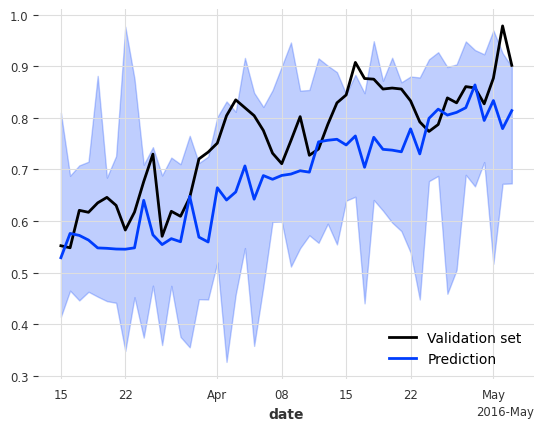

In [27]:
model_TFT=TFTModel.load_from_checkpoint(model_name=model_name,best=True)

# Predict using the model with covariates, providing the full future covariates time series
pred=model_TFT.predict(n=50, num_samples=30, future_covariates=covariates, past_covariates=past_covariates_sc)

val_sc.slice_intersect(pred).plot(label="Validation set")
pred.plot(label="Prediction")
plt.legend()
plt.show()

In [28]:
# Assuming you have a trained TFT model 'model_TFT' and scaled time series and covariates

# Define the forecast horizon
forecast_horizon = 10

# Generate historical forecasts using the TFT model
# Provide both scaled past and future covariates
historical_preds_sc_tft = model_TFT.historical_forecasts(
    series=temp_series_sc,
    past_covariates=past_covariates_sc, # Provide the full scaled past covariates
    future_covariates=covariates, # Provide the full scaled future covariates
    start=val_sc.start_time(), # Start historical forecasts from the beginning of the validation set
    forecast_horizon=forecast_horizon,
    stride=5, # Make a forecast every 5 steps (adjust as needed)
    retrain=False, # Do not retrain the model at each step
    verbose=True,
    last_points_only=True # Only keep the forecast for the specified horizon
)

# Inverse transform the historical forecasts using the scaler for the target variable
historical_preds_tft = sc.inverse_transform(historical_preds_sc_tft)

# Get the actual historical values corresponding to the forecast time index
actual_historical_tft = sc.inverse_transform(temp_series_sc.slice_intersect(historical_preds_tft))


# Calculate the MAE on the historical forecasts
mae_historical_tft = mae(actual_historical_tft, historical_preds_tft)

print(f"\nMean Absolute Error (MAE) on historical forecasts for TFT model (horizon={forecast_horizon}): {mae_historical_tft:.4f}")

# Compare this MAE with the MAE from the RNN model to see if the TFT with covariates performs better.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]


Mean Absolute Error (MAE) on historical forecasts for TFT model (horizon=10): 2.6318


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

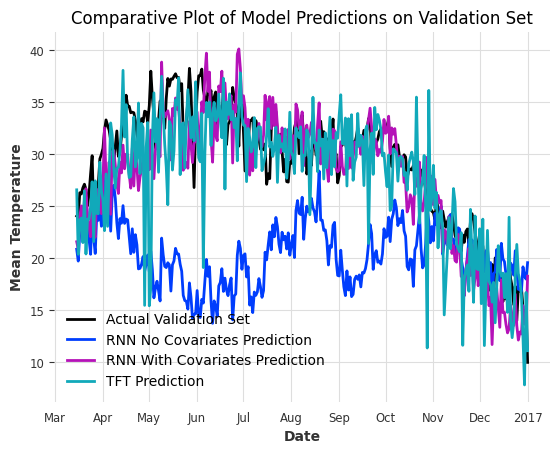

In [29]:
import matplotlib.pyplot as plt

# Use the existing trained models
# model_rnn is the RNN model without covariates
# model_cov is the RNN model with covariates
# model_TFT is the TFT model with covariates


# Define the prediction length (length of the validation set)
prediction_length = len(val_sc)

# Generate predictions on the validation set for each model
# For RNN models, we need to provide future_covariates if they were used in training
# For TFT, we need to provide both past and future covariates

# RNN without covariates
pred_rnn_no_covar_sc = model_rnn.predict(n=prediction_length, num_samples=1) # num_samples=1 for mean prediction

# RNN with covariates
# Provide the full scaled future covariates
pred_rnn_covar_sc = model_cov.predict(
    n=prediction_length,
    future_covariates=covariates, # Provide the full scaled future covariates
    num_samples=1 # num_samples=1 for mean prediction
)

# TFT with covariates
# Provide the full scaled past and future covariates
pred_tft_sc = model_TFT.predict(
    n=prediction_length,
    past_covariates=past_covariates_sc, # Provide the full scaled past covariates
    future_covariates=covariates, # Provide the full scaled future covariates
    num_samples=1 # num_samples=1 for mean prediction
)


# Inverse transform the predictions and the validation series
val_series.plot(label="Actual Validation Set")
sc.inverse_transform(pred_rnn_no_covar_sc).plot(label="RNN No Covariates Prediction")
sc.inverse_transform(pred_rnn_covar_sc).plot(label="RNN With Covariates Prediction")
sc.inverse_transform(pred_tft_sc).plot(label="TFT Prediction")

plt.title("Comparative Plot of Model Predictions on Validation Set")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()